In [11]:
import nltk, os, pickle,re,string,time, numpy as np, pandas as pd, gensim,math,random
from nltk import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
label_encode = {'agree':0, 'disagree':1, 'discuss':2,'unrelated':3}
label_decode = {0:'agree', 1:'disagree', 2:'discuss',3:'unrelated'}

def labelEncoder(feature_pd, features):
    newStance = [label_encode[s] for s in feature_pd.Stance]
    train_x = feature_pd[features]
    return train_x, newStance

In [13]:
from xgboost import XGBClassifier
train_df = pd.read_csv('train_processed_feat.csv')

features = ['cos','dis','overlap_count', 'kl','overlap_ratio']
train_x, train_y = labelEncoder(train_df, features)

In [14]:
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
evaluate_df = pd.read_csv('test_processed_feat.csv')
prediction = model.predict(evaluate_df[features])
prediction = [label_decode[p] for p in prediction]

In [16]:
num_agree = len(evaluate_df[evaluate_df.Stance == 'agree'])
num_disagree = len(evaluate_df[evaluate_df.Stance == 'disagree'])
num_discuss = len(evaluate_df[evaluate_df.Stance == 'discuss'])
num_unrelated = len(evaluate_df[evaluate_df.Stance == 'unrelated'])
print('agree:{}\t, disagree:{}\t, discuss:{}\t, unrelated:{}\t'.format(num_agree, num_disagree,num_discuss, num_unrelated))

# evaluate matrix 
unrelated_correct = 0
unrelated_N = 0
other_correct = 0
other_N = 0

for predict, true_label in zip(prediction, evaluate_df.Stance):
    if true_label == 'unrelated':
        unrelated_N += 1
        if predict == 'unrelated':
            unrelated_correct += 1
    else:
        if predict == true_label:
            other_correct +=1
        other_N +=1

unrelated_correct_ratio = unrelated_correct/unrelated_N
other_correct_ratio = other_correct/other_N
total_acc = 0.25*unrelated_correct_ratio + 0.75 * other_correct_ratio
print('total acc= {}, unrelated acc = {}, other acc = {}'.format(total_acc, round(unrelated_correct_ratio,2),other_correct_ratio ))

agree:1903	, disagree:697	, discuss:4464	, unrelated:18349	
total acc= 0.6851914353493579, unrelated acc = 0.99, other acc = 0.584088335220838


In [22]:
score = 0
total_score = 0

for p,true_laWel in zip(prediction, evaluate_df.Stance):
    if p == true_laWel:
        if true_laWel == 'unrelated':
            score += 0.25
            total_score += 0.25
        else:
            score += 1
            total_score += 1
    else:
        if true_laWel == 'unrelated':
            score += 0
            total_score += 0.25
        elif true_laWel != 'unrelated' and p != 'unrelated':
            score += 0.25
            total_score += 1
        else:
            score += 0
            total_score += 1

get_score = score * 100 / total_score 
print('score:', get_score)


score: 79.36272932088832


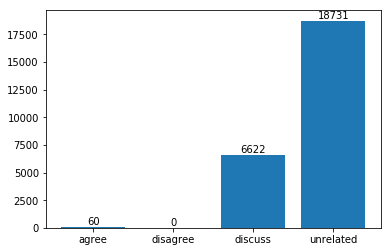

In [7]:
result_sum = []
result_sum.append(sum(np.array(prediction) == 'unrelated'))
result_sum.append(sum(np.array(prediction) == 'disagree'))
result_sum.append(sum(np.array(prediction) == 'agree'))
result_sum.append(sum(np.array(prediction) == 'discuss'))
plt.bar(['unrelated', 'disagree', 'agree', 'discuss'], result_sum)  
for a,b in zip(['unrelated', 'disagree', 'agree', 'discuss'], result_sum):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()  

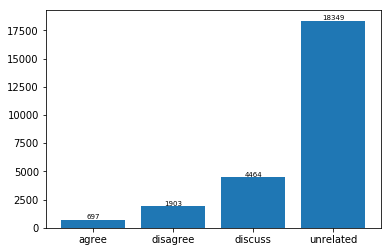

In [8]:
validataion_sum = []
validataion_sum.append(sum(evaluate_df['Stance'] == 'unrelated'))
validataion_sum.append(sum(evaluate_df['Stance'] == 'agree'))
validataion_sum.append(sum(evaluate_df['Stance'] == 'disagree'))
validataion_sum.append(sum(evaluate_df['Stance'] == 'discuss'))
plt.bar(['unrelated', 'disagree', 'agree', 'discuss'], validataion_sum)  
for a,b in zip(['unrelated', 'disagree', 'agree', 'discuss'],validataion_sum):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

plt.show()  

In [9]:
# sum_agree = sum([1 for label in prediction if label == 'agree'])
# sum_disagree = sum([1 for label in prediction if label == 'disagree'])
# sum_discuss = sum([1 for label in prediction if label == 'discuss'])
# sum_unrelated = sum([1 for label in prediction if label == 'unrelated'])

# print("agree:{}\tdisagree:{}\tdiscuss:{}\tunrelated:{}".format(sum_agree, sum_disagree, sum_discuss, sum_unrelated))

In [10]:
# sum_agree = sum([1 for label in validation_data.Stance if label == 'agree'])
# sum_disagree = sum([1 for label in validation_data.Stance if label == 'disagree'])
# sum_discuss = sum([1 for label in validation_data.Stance if label == 'discuss'])
# sum_unrelated = sum([1 for label in validation_data.Stance if label == 'unrelated'])

# print("true:agree:{}\tdisagree:{}\tdiscuss:{}\tunrelated:{}".format(sum_agree, sum_disagree, sum_discuss, sum_unrelated))